In [1]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Defaults
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams.update({'font.size': 12})
#plt.style.use('ggplot')
#pd.set_option('display.max_rows', None)

In [2]:
def preprocess(df):
    df = df.drop(['Lat', 'Long'], axis = 1)
    df = df.groupby(['Country/Region'], as_index = False).sum()
    df.loc[-1] = df.sum()
    df.loc[-1, 'Country/Region'] = 'Worldwide'
    countries = ['US', 'Germany', 'Spain', 'United Kingdom', 'France',
             'India', 'Iran', 'Italy', 'Russia', 'Turkey', 'Worldwide']
    df = df.loc[df['Country/Region'].isin(countries)]
    df.reset_index(drop = True, inplace = True)
    df = df.set_index('Country/Region').transpose()
    return df

In [3]:
confirmed_df = pd.read_csv("./csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed_df = preprocess(confirmed_df)
deaths_df = pd.read_csv("./csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths_df = preprocess(deaths_df)
recovered_df = pd.read_csv("./csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recovered_df = preprocess(recovered_df)

<AxesSubplot:>

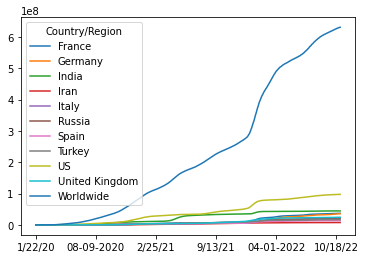

In [4]:
confirmed_df.plot()

<AxesSubplot:>

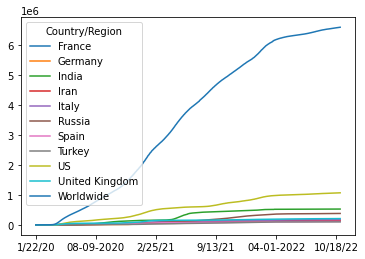

In [5]:
deaths_df.plot()

<AxesSubplot:>

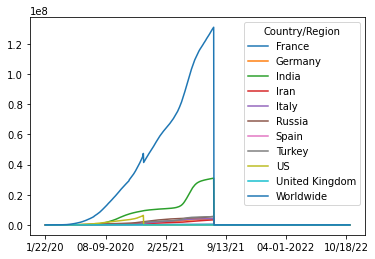

In [6]:
recovered_df.plot()

In [26]:
confirmed_df

Country/Region,France,Germany,India,Iran,Italy,Russia,Spain,Turkey,US,United Kingdom,Worldwide
1/22/20,0,0,0,0,0,0,0,0,1,0,557
1/23/20,0,0,0,0,0,0,0,0,1,0,657
1/24/20,2,0,0,0,0,0,0,0,2,0,944
1/25/20,3,0,0,0,0,0,0,0,2,0,1437
1/26/20,3,0,0,0,0,0,0,0,5,0,2120
...,...,...,...,...,...,...,...,...,...,...,...
10/27/22,36964789,35523412,44649088,7557134,23475187,21097662,13488015,16919638,97418396,24122642,629545455
10/28/22,36990572,35571130,44650662,7557240,23504224,21105179,13511768,16919638,97448572,24122909,629894860
10/29/22,36990572,35571130,44652256,7557364,23531023,21112216,13511768,16919638,97457553,24122909,630093767
10/30/22,36990572,35571131,44653592,7557437,23531023,21118937,13511768,16919638,97460811,24122909,630260870


In [25]:
# Define the p, d, q parameters
p = range(4, 12)
d = range(1, 2)
q = range(2, 6)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {}'.format(pdq[0]))
print('SARIMAX: {}'.format(pdq[1]))
print('SARIMAX: {}'.format(pdq[2]))
print('SARIMAX: {}'.format(pdq[3]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (4, 1, 2)
SARIMAX: (4, 1, 3)
SARIMAX: (4, 1, 4)
SARIMAX: (4, 1, 5)


In [30]:
confirmed_train = confirmed_df['1/22/20':'6/22/21']
confirmed_test = confirmed_df['6/23/21':'12/31/21']

<AxesSubplot:>

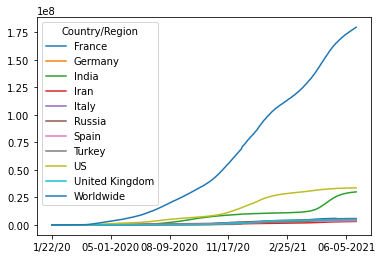

In [31]:
confirmed_train.plot()